In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [9]:
readed_data = pd.read_csv('UniversalBank.csv')
# data.sample(20)
readed_data.shape

(5000, 14)

In [10]:
readed_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
data = readed_data.drop(["ID","ZIP Code"], axis=1)
data.shape

(5000, 12)

<Axes: title={'center': 'Here wasim generated first time the heat map of the system'}>

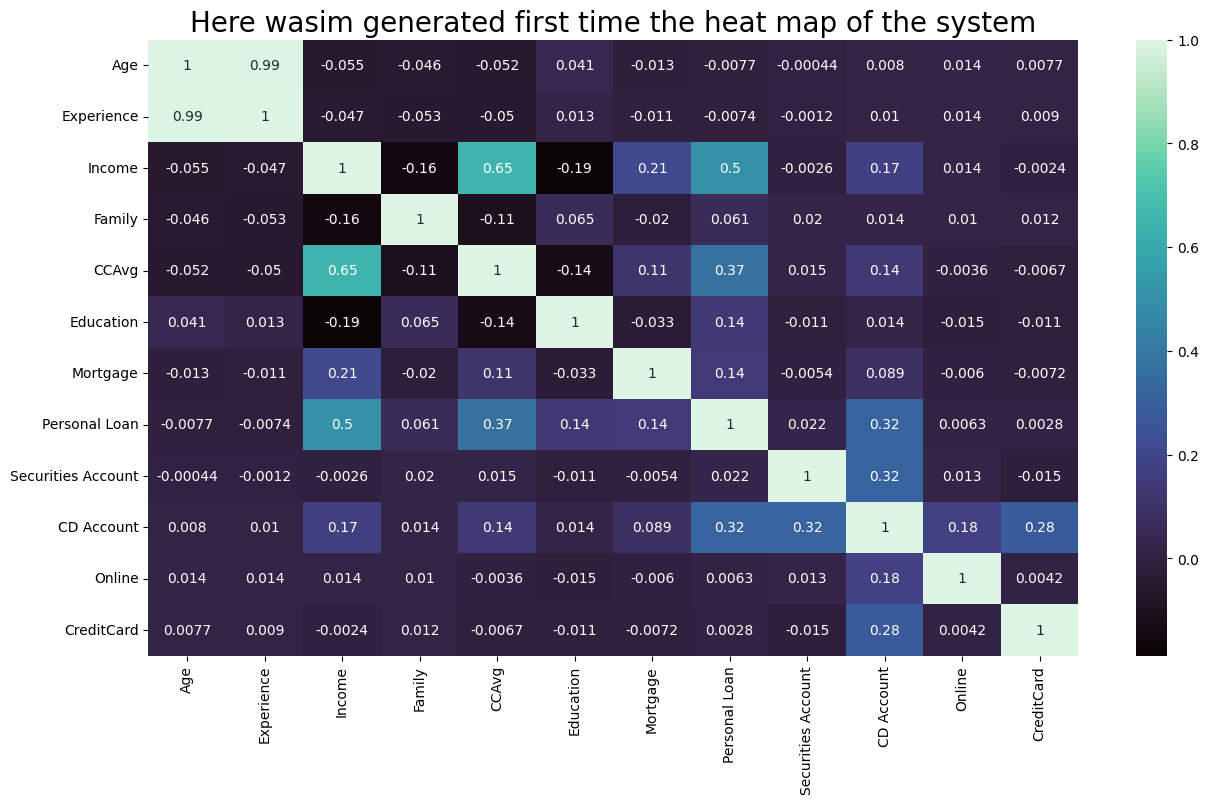

In [18]:
plt.figure(figsize=(15,8))
plt.title("Here wasim generated first time the heat map of the system",fontsize=20)
sns.heatmap(data.corr(),annot=True, cmap='mako')

In [21]:
zero_class = data[data.CreditCard==0]
one_class = data[data.CreditCard==1]

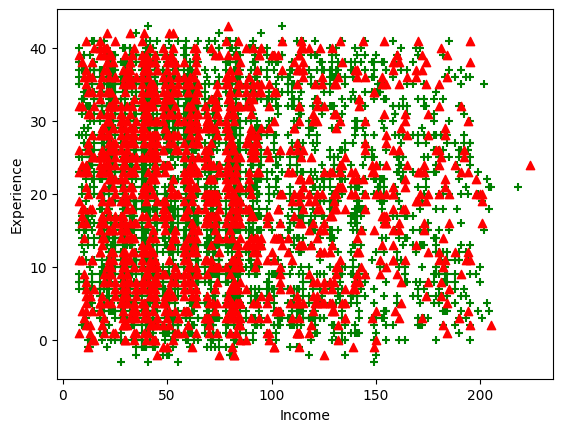

In [29]:
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Income'], one_class['Experience'], color = 'red', marker='^')

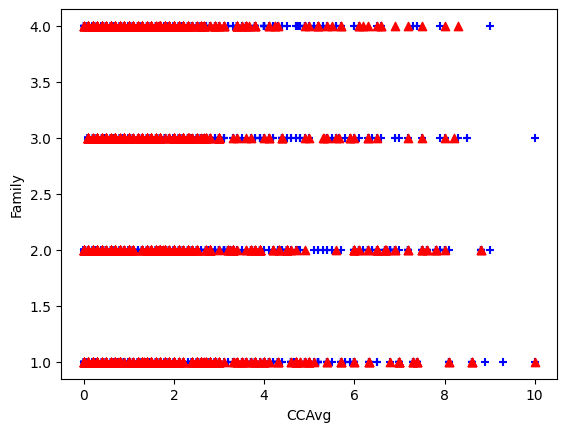

In [31]:
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'], color = 'blue', marker='+')
plt.scatter(one_class['CCAvg'], one_class['Family'], color = 'red', marker='^')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(data.drop('CreditCard',axis=1)).transform(data.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=data.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [ ]:
X = df_scaled
y = data['CreditCard']

Here is the imlementation

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Print predictions alongside the actual test labels
# for pred, actual in zip(y_pred, y_test):
    # print(f"Predicted: {pred}, Actual: {actual}")

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")



Accuracy: 0.75


C:\Users\DELL\AppData\Local\Temp\ipykernel_15804\2275417125.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.coolwarm, label='Test Data')


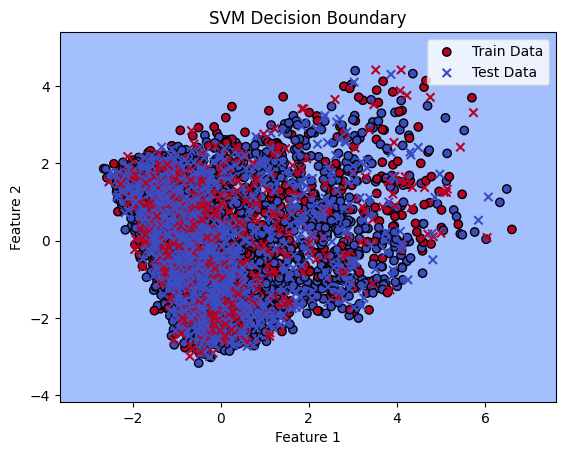

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions if necessary
if X_train.shape[1] > 2:
    pca = PCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
else:
    X_train_2d = X_train
    X_test_2d = X_test

# Train the SVM model on 2D data
svm_2d = SVC(kernel='linear', C=1.0)  # Adjust kernel and parameters as needed
svm_2d.fit(X_train_2d, y_train)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, marker='o', edgecolor='k', cmap=plt.cm.coolwarm, label='Train Data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.coolwarm, label='Test Data')
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


<Axes: >

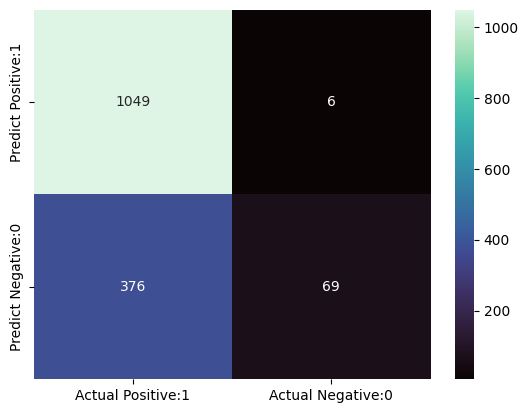

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1055
           1       0.92      0.16      0.27       445

    accuracy                           0.75      1500
   macro avg       0.83      0.57      0.56      1500
weighted avg       0.79      0.75      0.67      1500



Linear Kernal

Model accuracy with linear kernel : 0.743
              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1055
           1       0.86      0.16      0.27       445

    accuracy                           0.74      1500
   macro avg       0.80      0.57      0.56      1500
weighted avg       0.77      0.74      0.67      1500



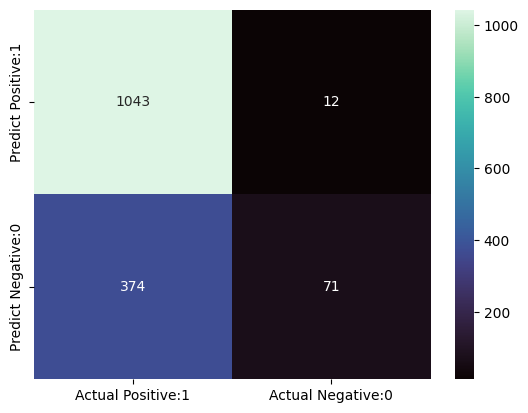

In [78]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='linear').fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))
#visualisation on heatmap
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
#classification report
print(classification_report(y_test,y_pred))

Gaussian RBF kernal

Model accuracy with rbf kernel : 0.745
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1055
           1       0.92      0.16      0.27       445

    accuracy                           0.75      1500
   macro avg       0.83      0.57      0.56      1500
weighted avg       0.79      0.75      0.67      1500



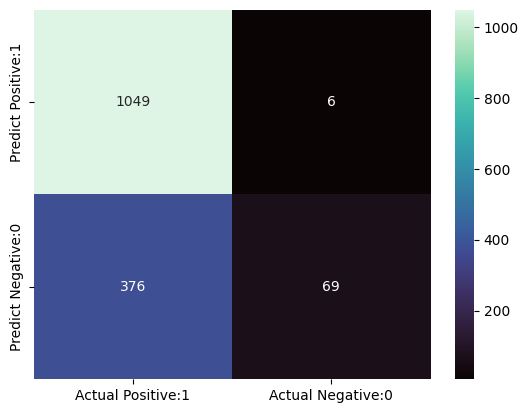

In [79]:
rbf_svc=SVC(kernel='rbf').fit(X_train,y_train)
y_pred = rbf_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

#visualisation in heatmap
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
#classification report
print(classification_report(y_test,y_pred))

Polynomial Kernal

Model accuracy with rbf kernel : 0.745
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1055
           1       0.92      0.15      0.26       445

    accuracy                           0.74      1500
   macro avg       0.83      0.57      0.55      1500
weighted avg       0.79      0.74      0.67      1500



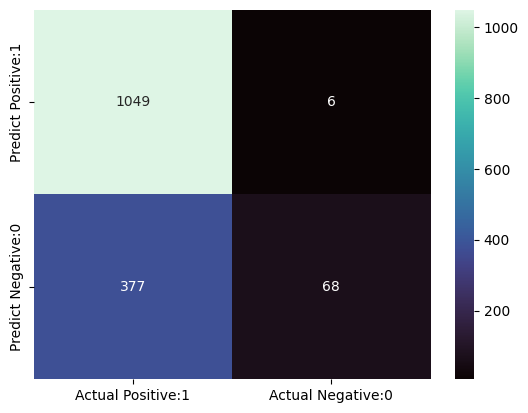

In [80]:
Poly_svc=SVC(kernel='poly', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

#heatmap
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
#classfication report
print(classification_report(y_test,y_pred))

Sigmoid Kernal

Model accuracy with rbf kernel : 0.628
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1055
           1       0.36      0.31      0.33       445

    accuracy                           0.63      1500
   macro avg       0.54      0.54      0.54      1500
weighted avg       0.61      0.63      0.62      1500



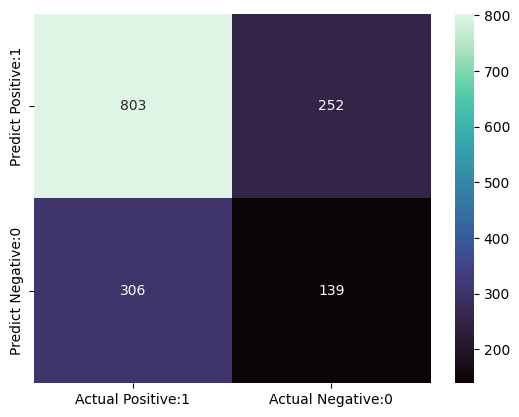

In [81]:
Poly_svc=SVC(kernel='sigmoid', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

#heatmap
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
#classfication report
print(classification_report(y_test,y_pred))

The (polynomial/Gussian RBF) Kernal is best suited method to use in our case with accuracy